# Week 10 handin

## Handin Exercise 10
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
![image.png](attachment:image.png)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.


## Status
All exercises done, except 7, had trouble doting clustercenters.

## Solution part 1

In [169]:
# load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 Petal columns. Now we are left with a 2D feature space
# get unique labels (Species column)
import pandas as pd

file = '../data/iris_data.csv'
iris_data = pd.read_csv(file, delimiter = ",", decimal = ',')

iris_data_df = pd.DataFrame(iris_data)
del iris_data_df["Petal length"]
del iris_data_df["Petal width"]

species = iris_data_df['Species'].unique()

print("Exercise 1 - 2D feature space\n", iris_data_df)
print("Exercise 2 - Get unique labels species column\n", species)

Exercise 1 - 2D feature space
      Sepal length  Sepal width       Species
0             5.1          3.5     I. setosa
1             4.9          3.0     I. setosa
2             4.7          3.2     I. setosa
3             4.6          3.1     I. setosa
4             5.0          3.6     I. setosa
..            ...          ...           ...
145           6.7          3.0  I. virginica
146           6.3          2.5  I. virginica
147           6.5          3.0  I. virginica
148           6.2          3.4  I. virginica
149           5.9          3.0  I. virginica

[150 rows x 3 columns]
Exercise 2 - Get unique labels species column
 ['I. setosa' 'I. versicolor' 'I. virginica']


Exercise 3 - scatter plot iris by colored label


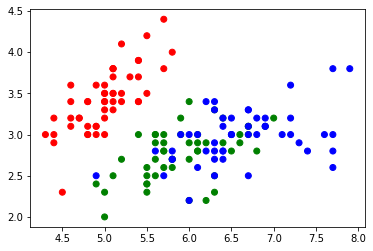

In [170]:
# 3 - plot with a scatter plot each iris flower sample colored by label (3 different colors)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
colors = {'I. setosa':'red', 'I. versicolor':'green', 'I. virginica':'blue' }
print("Exercise 3 - scatter plot iris by colored label")
ax.scatter(iris_data_df['Sepal length'], iris_data_df['Sepal width'], c=iris_data_df['Species'].map(colors))


Number of estimated clusters : 3
[[6.18169014 2.87887324 0.        ]
 [4.99545455 3.37272727 1.        ]
 [7.37272727 3.00909091 2.        ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0 0 2 1 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Exercise 6 - scatter plot iris by colored cluster label


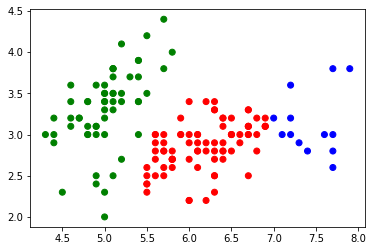

In [172]:
# 4 - use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters
# (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result)
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
import numpy as np

bandwidth = estimate_bandwidth(X=iris_data_df.drop('Species', axis=1), quantile=0.2)

ms = MeanShift(bandwidth=bandwidth)

ms.fit(iris_data_df.drop('Species', axis=1))
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print('Number of estimated clusters : {}'.format(n_clusters)) 
print(cluster_centers)
print(labels)
iris_data_df['Label'] = labels

fig, ax = plt.subplots()
colors2 = {0:'red', 1:'green', 2:'blue' }
print("Exercise 6 - scatter plot iris by colored cluster label")
ax.scatter(iris_data_df['Sepal length'], iris_data_df['Sepal width'], c=iris_data_df['Label'].map(colors2))
